# **1. Download the Dataset**

# New Section

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
!unzip '/content/drive/MyDrive/Flowers-Dataset'

unzip:  cannot find or open /content/drive/MyDrive/Flowers-Dataset, /content/drive/MyDrive/Flowers-Dataset.zip or /content/drive/MyDrive/Flowers-Dataset.ZIP.


# **2. Image Augmentation**

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/drive/MyDrive/flowers"

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [27]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(64,64),
class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


# **3. Create Model**

In [40]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [41]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=32)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [42]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
seed=107,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [43]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

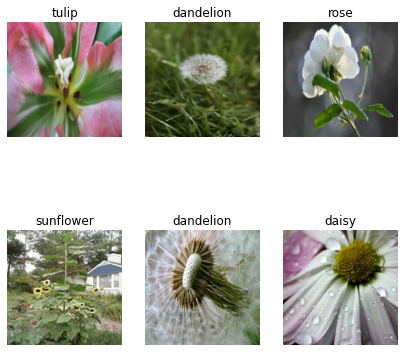

In [44]:
plt.figure(figsize=(7, 7))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

# **4. Add Layers**

**4.1 Convolution layer**

In [45]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

**4.2 Maxpooling layer**

In [46]:
model.add(MaxPooling2D(pool_size = (2,2)))

**4.3 Flatten**

In [47]:
model.add(Flatten())

**4.4 Hidden/dense layers**

In [48]:
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))

**4.5 Output layer**

In [49]:
model.add(Dense(5, activation = "softmax"))

# **5. Compiling Model**

In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# **6. Fit The Model**

In [53]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 333s 8s/step - loss: 1.1582 - accuracy: 0.5249
Epoch 2/15
44/44 [==============================] - 38s 855ms/step - loss: 1.0540 - accuracy: 0.5814
Epoch 3/15
44/44 [==============================] - 40s 904ms/step - loss: 1.0023 - accuracy: 0.6002
Epoch 4/15
44/44 [==============================] - 38s 863ms/step - loss: 0.9490 - accuracy: 0.6296
Epoch 5/15
44/44 [==============================] - 38s 859ms/step - loss: 0.9318 - accuracy: 0.6305
Epoch 6/15
44/44 [==============================] - 38s 855ms/step - loss: 0.9107 - accuracy: 0.6505
Epoch 7/15
44/44 [==============================] - 38s 855ms/step - loss: 0.8622 - accuracy: 0.6627
Epoch 8/15
44/44 [==============================] - 40s 927ms/step - loss: 0.8404 - accuracy: 0.6810
Epoch 9/15
44/44 [==============================] - 38s 861ms/step - loss: 0.8206 - accuracy: 0.6829
Epoch 10/15
44/44 [==============================] - 38s 855ms/step - loss: 0.7820 - accuracy

# **7. Save The Model**

In [54]:
model.save("flowers.h1")

# **8. Test The Model**

In [60]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [62]:
model = load_model("/content/flowers.h1")

In [64]:
daisy_img = image.load_img('/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)

1/1 [==============================] - 0s 120ms/step


In [66]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'sunflowers'

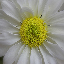

In [67]:
daisy_img